In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
from scipy.stats import entropy

import glob
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy import stats
from plot_tools import *
from metrics import *

%matplotlib inline

In [2]:
def dimension(g):
    g = np.exp(-g)
    eig = np.clip(np.linalg.eigvalsh(g), 10e-6, None)
    eig = eig / np.sum(np.abs(eig))
    return np.exp(np.sum(- eig * np.log(eig)))

form = 'png'

In [35]:
names = ['Ic','Ih','II','VIII','IX',#'X',
         'XIII','XIV','XV','XVII',
         'sII','sH']

spectra = []

#spectra.append(np.mean(np.load('../results/1.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/2.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/3.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/4.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/5.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/6.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/7.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/8.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/8bis.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/9.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/10.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/11.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/12.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/13.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/14.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/15.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/16.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/17.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/18.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/19.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/20.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/21.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/22.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/23.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/24.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/25.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/26.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/27.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/28.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/29.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/30.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/31.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/32.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/33.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/34.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/35.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/36.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/37.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/38.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/39.npz')['arr_0'],axis=0))

spectra.append(np.mean(np.load('../results/Ic.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/Ih.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/II.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/VIII.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/IX.npz')['arr_0'],axis=0))
#spectra.append(np.mean(np.load('../results/X.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/XIII.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/XIV.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/XV.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/XVII.npz')['arr_0'],axis=0))

#spectra.append(np.mean(np.load('../results/i.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/sII.npz')['arr_0'],axis=0))
spectra.append(np.mean(np.load('../results/sH.npz')['arr_0'],axis=0))


distmat = np.zeros((len(spectra),len(spectra)))

for i in range(len(spectra)):
    for j in range(i+1,len(spectra)):
        distmat[i,j] = DistanceSoap(spectra[i],spectra[j])
        distmat[j,i] = DistanceSoap(spectra[j],spectra[i])

        
#print(distmat)

In [36]:
import numpy
numpy.__version__

'1.19.2'

In [37]:
ff = names #[mapping_num[i] for i in range(len(x))]

#names = ['Ih','II','VI','VIII','IX','XIII','XIV','XV']
#         #'X','XIII','XIV','XV']

#color=['#74d2e7','#48a9c5','#0085ad','#005670','#00205b',
#       '#ff00ff','#009f4d','#84bd00','#efdf00']
#,'#fe5000',
#'#0077c8','#e4002b','#da1884','#a51890','#008eaa']

def get_colors(color_list):
    mapping_color = {
        "Ih": "#74d2e7",
        "II": "#48a9c5",
        "VI": "#0085ad",
        "VIII": "#005670",
        "IX": "#00205b",
        "X": "#ff00ff", 
        "XIII": "#009f4d",
        "XIV": "#84bd00",
        "XV": "#efdf00",
        "TIP4P-ICE": "#fe5000",
        "TIP4P/ε": "#0077c8",
        "TIP4P-FB": "#e4002b",
        "OPC" : "#da1884",
        "TIP5P": "#a51890",
        "TIP5P-EW": "#008eaa",
    }
    return [mapping_color[i] for i in color_list]

<ipython-input-38-e9e0eb7a0a20>:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(d, "average", optimal_ordering=True)


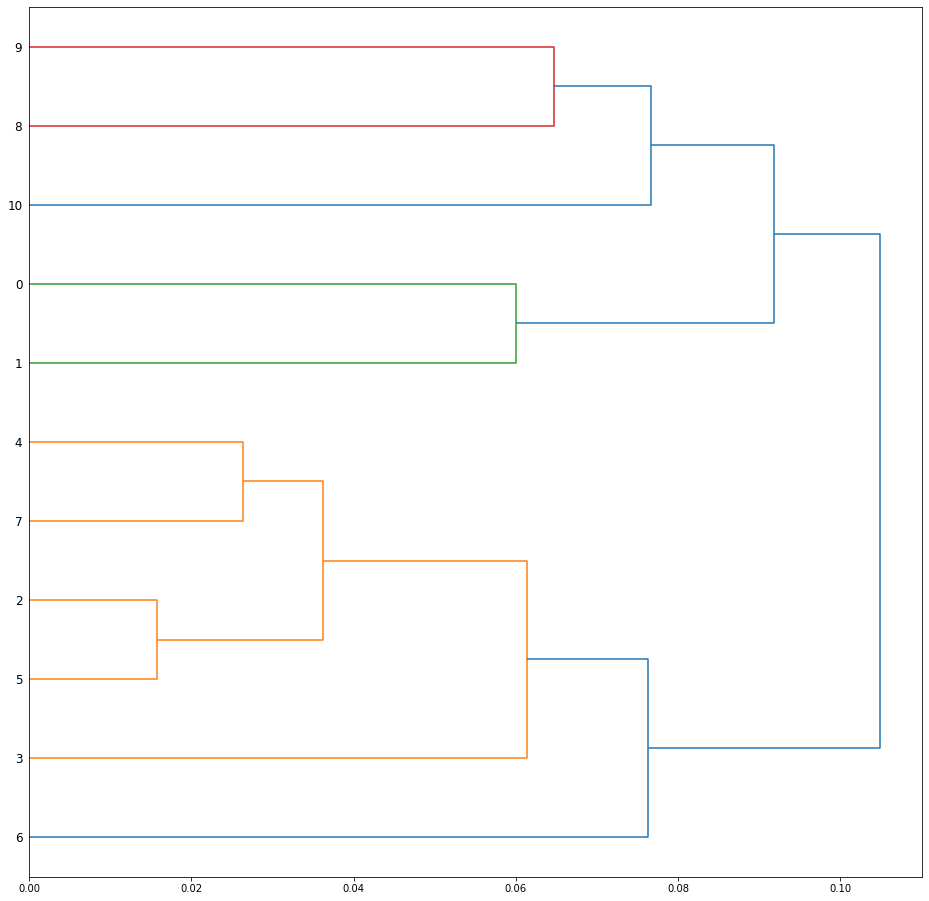

In [38]:
d = distmat # np.load('../dscribe_4beads_1us/distance_avg_30_ang.npy')
fig, axes = plt.subplots(1, 1, figsize=(16, 16))

linkage_matrix = linkage(d, "average", optimal_ordering=True)
u = np.array(dendrogram(linkage_matrix, distance_sort=True, orientation='right', ax=None)['leaves'])
u = u[::-1]
v = d[u,:][:,u]

/opt/local/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/matrix.py:629: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


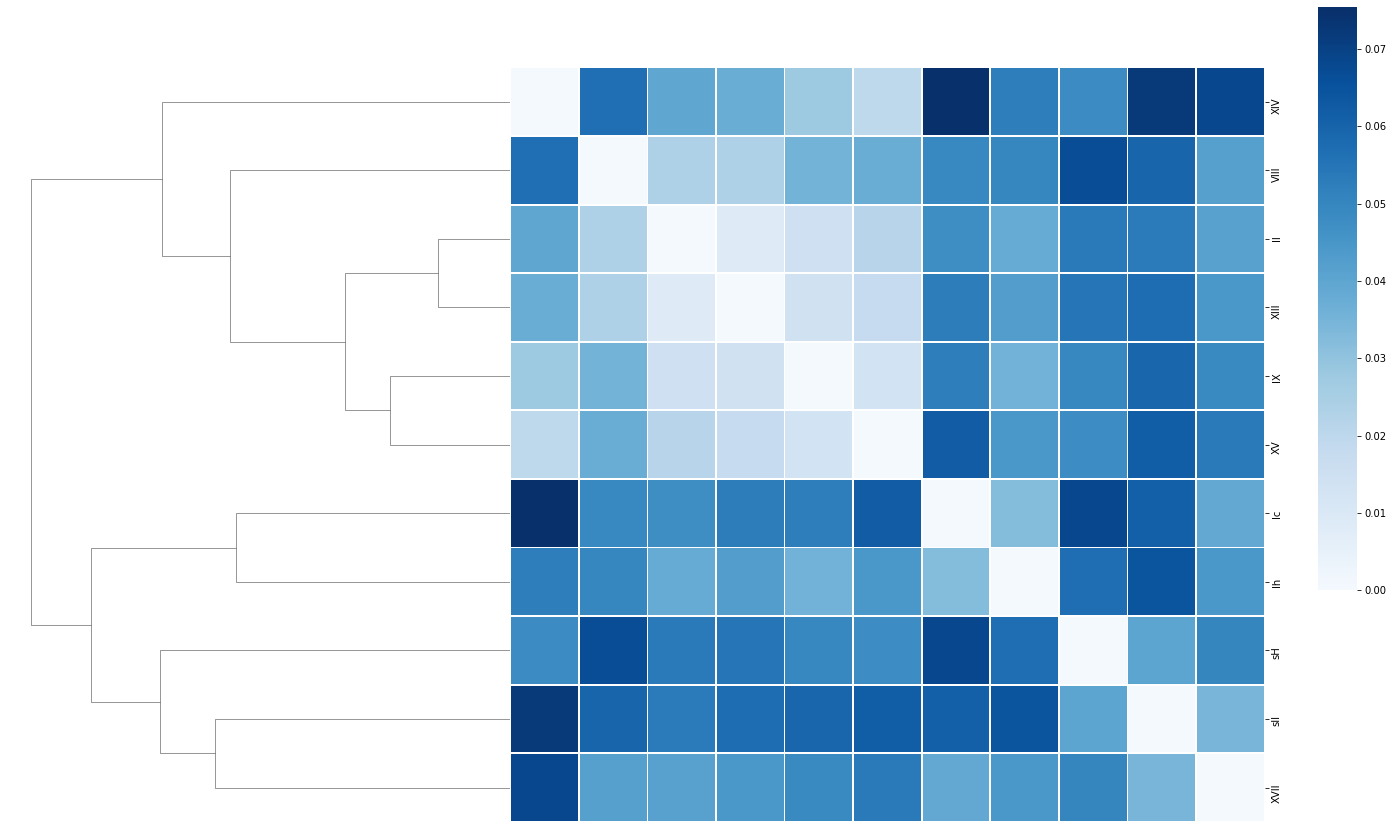

In [39]:
ffs = [names[i] for i in u]
df = pd.DataFrame(v, index=ffs, columns=ffs)

center = df.values[np.tril_indices(df.shape[0], k=1)].mean()

g = sns.clustermap(df, center=center, cmap="Blues", method="average",
                   #row_colors=get_colors(df.index),
                   dendrogram_ratio=(.4, .4),
                   cbar_pos=(1.02, .2, .03, .45),
                   linewidths=.75, figsize=(18, 18))

g.ax_col_dendrogram.remove()
_ = g.ax_heatmap.set_xticks([])
g.savefig('distmat_4beads_avg_30_ang_referee.{}'.format(form), bbox_inches='tight')
df.to_csv('distmat_4beads_avg_30_ang_referee.csv')

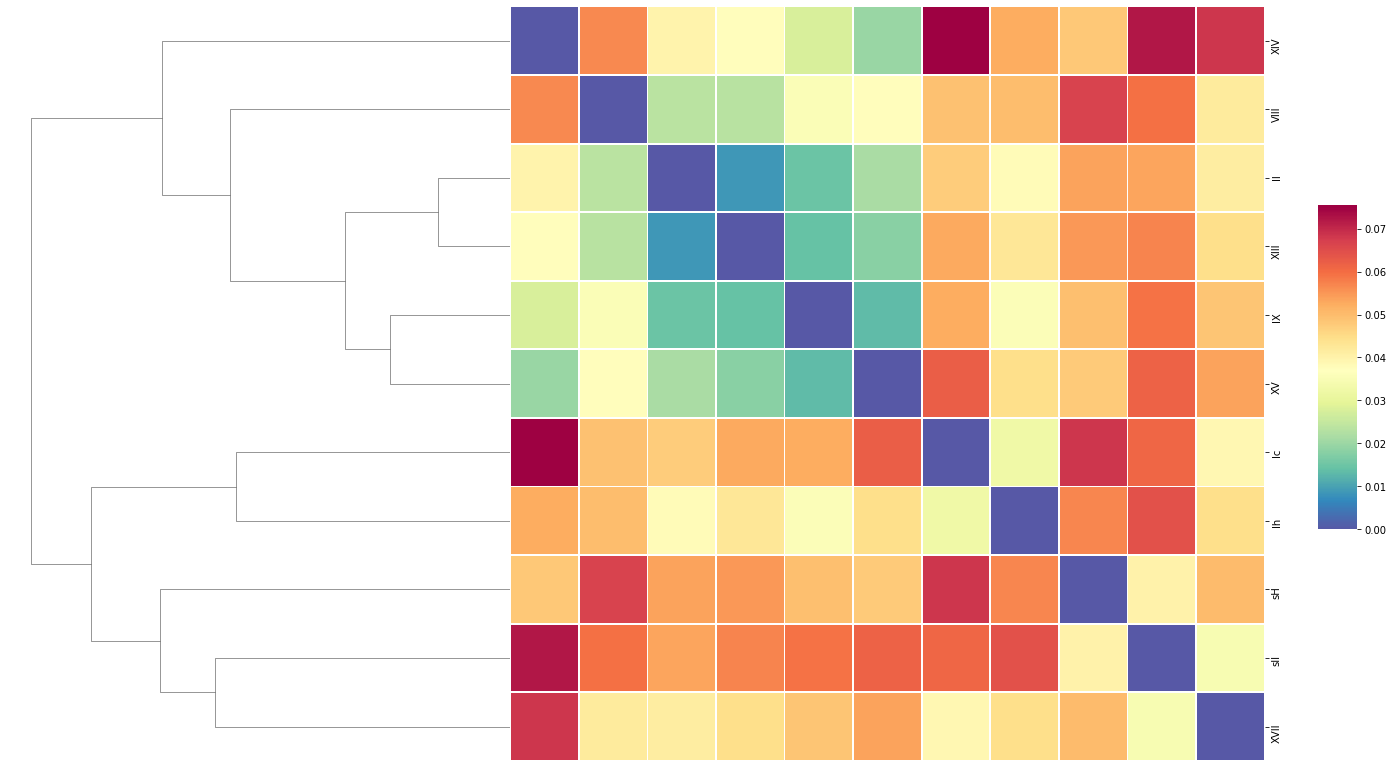

In [40]:
ffs = [names[i] for i in u]
df = pd.DataFrame(v, index=ffs, columns=ffs)


center = df.values[np.tril_indices(df.shape[0], k=1)].mean()

g = sns.clustermap(df, center=center, cmap="Spectral_r", method="average",
                   #row_colors=get_colors(df.index),
                   dendrogram_ratio=(.4, .4),
                   cbar_pos=(1.02, .2, .03, .25),
                   linewidths=.75, figsize=(18, 18))

g.ax_col_dendrogram.remove()
_ = g.ax_heatmap.set_xticks([])
g.savefig('distmat_4beads_avg_30_ang_referee.png', bbox_inches='tight')
g.savefig('distmat_4beads_avg_30_ang_referee.pdf', bbox_inches='tight')

df.to_csv('distmat_4beads_avg_30_ang_referee.csv')

In [41]:
from sklearn import manifold

#names = ['SPC','SPC/E','SPC/Eb','TIP3P','TIP3P-FB',
#         'OPC3','TIP4P','TIP4P-EW','TIP4P/2005','TIP4P-ICE',
#         'TIP4P/ε','TIP4P-FB','OPC','TIP5P','TIP5P-EW']
#color=['#74d2e7','#48a9c5','#0085ad','#005670','#00205b',
#       '#ff00ff','#009f4d','#84bd00','#efdf00','#fe5000',
#       '#0077c8','#e4002b','#da1884','#a51890','#008eaa']
#names = ['Ih','II','VI','VIII','IX','X','XIII','XIV','XV']

#color=['#74d2e7','#48a9c5','#0085ad','#005670','#00205b',
#       '#ff00ff','#009f4d','#84bd00','#efdf00']

names = ['Ic','Ih','II','VIII','IX',#'X','XIII','XIV','XV','XVII',
         'XIII','XIV','XV','XVII',
         'sII','sH']

color = ['#888888' for x in names ]

markers =['o','o','o','o','o','o','o','o','o','o',
          'o','o'] #,'o']




/opt/local/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


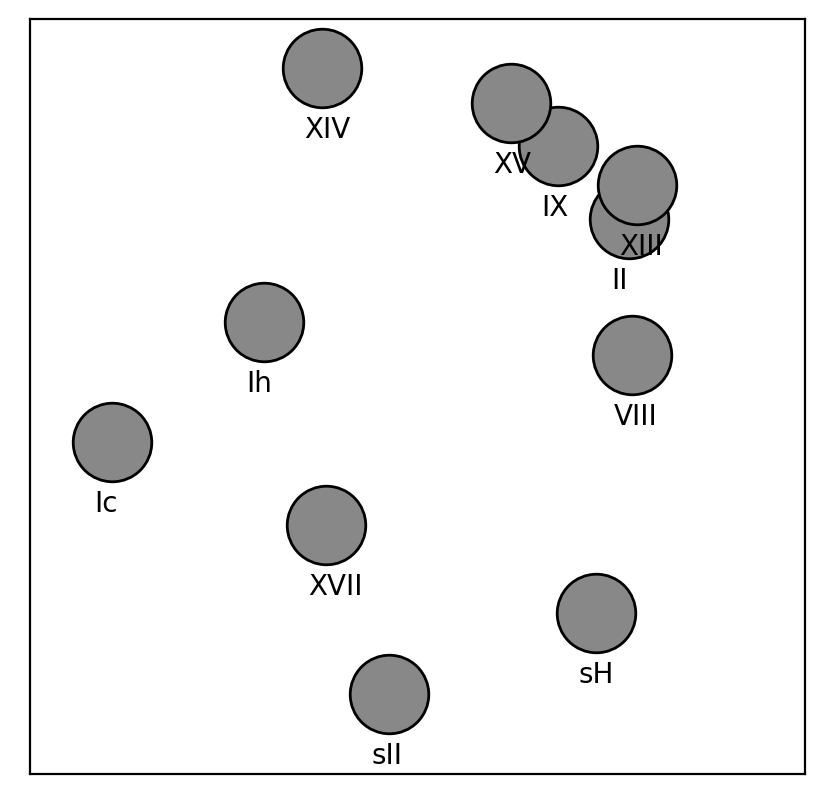

In [42]:
d = distmat #np.load('../dscribe_4beads_1us/distance_avg_30_ang.npy')
#d = d[:, np.array(index)][np.array(index), :]
d = (d - np.amin(d)) / (np.amax(d) - np.amin(d))

mds = manifold.MDS(n_components=2, dissimilarity="euclidean", random_state=7, max_iter=10000)
results = mds.fit(d)

coords = results.embedding_

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

xoff = np.array([-0.05] * len(names))

yoff = np.array([-0.22] * len(names))

coords[:,0] -= 0.1 
for i in range(coords.shape[0]):
    ax.scatter(coords[i, 0],coords[i,1], s=800, marker=markers[i],edgecolor='k',label=names[i], c=color[i] )
    ax.annotate(names[i], (coords[i,0] + xoff[i], coords[i,1] + yoff[i] ))
    
# plt.legend(bbox_to_anchor=(0., 1.1, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)
# ax.set_title("Force Fields distribution " + "Å")

_ = ax.set_xlim((-1.3, 0.9))
_ = ax.set_ylim((-1.4, 1))

_ = plt.xticks([], [])
_ = plt.yticks([], [])
fig.savefig('ffdistr_4beads_avg_30_ang_referee.png')
fig.savefig('ffdistr_4beads_avg_30_ang_referee.pdf')